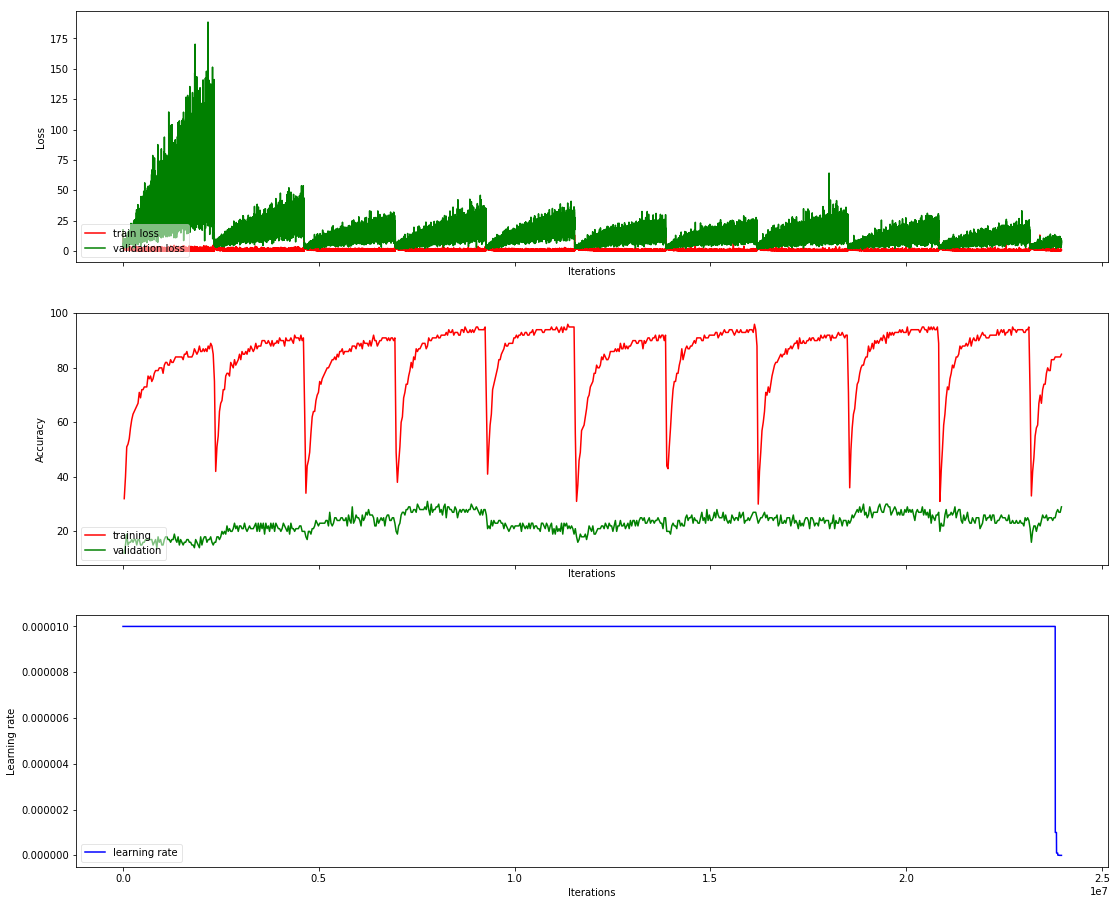

Iter 23968000, Loss = 1.234622, Training Accuracy = 85.000, Validation Accuracy = 29.000
No Improvement for 500 cycles, scaling down LR to 1.0000000000000003e-11
No Improvement for 500 cycles, terminating
Optimization Terminated!


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pickle
import time
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import SimpleITK as sitk

from IPython import display

from nn_model import NNModel

from stat_helper import *

num_classes = 32
itr = 2e8

name = "Test2PathNet"
print(name)

NNModel(name=name, num_classes=num_classes).train(
    './Output/{0}_class'.format(num_classes),
    learning_rate=1e-5,
    iterations=itr,
    steps_to_downscale=500,
    batch_size=16,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pickle
import time
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import SimpleITK as sitk

from IPython import display

from nn_model import NNModel

from stat_helper import *

count = 10
angle_inc = [10, None]
num_classes = 17
itr = 2e8

name = "Test2PathNet"
print(name)

for i in range(0, count):
    for a in angle_inc:
        a_f = "360" if a is None else str(a)
        name = "TwoPathNet_{1}_{2}_{0}".format(i, a_f, num_classes)
        NNModel(name=name, num_classes=num_classes).train(
            './Output/{0}_class'.format(num_classes),
            learning_rate=1e-5,
            iterations=itr,
            steps_to_downscale=10,
            batch_size=16,
            angles = {
                'train': list(range(0, 360, a)) if a is not None else [0],
                'validate': list(range(0, 360, 360)),
                'test': list(range(0, 360, 360))
            }
        )

In [5]:
import tensorflow as tf
sess = tf.Session()

In [12]:
x = tf.constant([
    [12.2312, 32.3123, 145.23232],
    [12.2312, 145.23232, 32.3123],
    [12.2312, 32.3123, 145.23232]
])

sm = tf.nn.softmax(x)

sm = tf.nn.softmax_cross_entropy_with_logits(logits=sm, labels=[
    [0,0,1],
    [1,0,0],
    [0,0,1]
])

sm.eval(session=sess)

array([ 0.55144471,  1.55144465,  0.55144471], dtype=float32)